In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
import glob
import matplotlib.pyplot as plt
import seaborn as sns

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


# initiall clean up

In [2]:
uprn = pd.read_csv('./../../Volumes/Extreme_SSD/WORK/MAV/UPRN/osopenuprn_202409.csv')
#uprn = uprn.iloc[:,[0,3,4]]
#uprn['UPRN'] = uprn['UPRN'].astype('float64')
#uprn.to_csv('./../../Volumes/Extreme_SSD/WORK/MAV/UPRN/osopenuprn_202409.csv')

In [ ]:
LSOA = gpd.read_file('./../../Volumes/Extreme_SSD/WORK/boundaries/LSOA_2021.geojson')
LSOA.plot()

# create small area lookups

## lsoa

In [6]:
uprn = pd.read_csv('./../../Volumes/Extreme_SSD/WORK/MAV/UPRN/osopenuprn_202409.csv')

uprn = gpd.GeoDataFrame(uprn, geometry = gpd.points_from_xy(uprn.LONGITUDE,uprn.LATITUDE), crs = "EPSG:4326")
uprn = uprn.iloc[:,[0,3]]

In [ ]:
print(uprn.crs) 
print(LSOA.crs)

In [ ]:
LSOA = LSOA.to_crs('EPSG:4326')

In [ ]:
uprn2 = uprn.sjoin(LSOA.iloc[:,[1,4]],how = 'left' )
uprn2.info()

In [ ]:
pd.DataFrame(uprn2[~uprn2['LSOA21CD'].isna()].iloc[:,[0,3]]).to_csv('./../../Volumes/Extreme_SSD/WORK/MAV/UPRN/uprn_lsoa_lookup.csv')

## datazones

In [3]:
dz = gpd.read_file('./../../Volumes/Extreme_SSD/WORK/boundaries/scotland/DataZones_2011.geojson')


In [8]:
dz = dz.to_crs('EPSG:4326')

In [12]:
print(uprn.crs)
print(dz.crs)

EPSG:4326
EPSG:4326


In [16]:
uprn3 = uprn.sjoin(dz.iloc[:,[0,2,3,9]],how = 'left' )
uprn3.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 40909714 entries, 0 to 40909713
Data columns (total 6 columns):
 #   Column       Dtype   
---  ------       -----   
 0   UPRN         float64 
 1   geometry     geometry
 2   index_right  float64 
 3   DataZone     object  
 4   TotPop2011   float64 
 5   ResPop2011   float64 
dtypes: float64(4), geometry(1), object(1)
memory usage: 2.1+ GB


<Axes: >

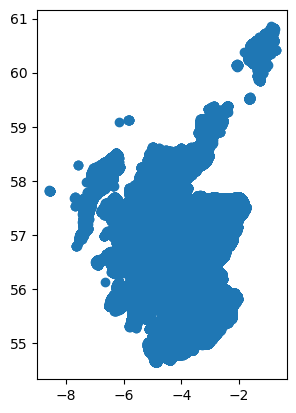

In [26]:
uprn3[~uprn3['DataZone'].isna()].plot()

In [29]:
pd.DataFrame(uprn3[~uprn3['DataZone'].isna()].loc[:,['UPRN','DataZone']]).to_csv('./../../Volumes/Extreme_SSD/WORK/MAV/UPRN/uprn_datazones_lookup.csv', index=False)